Pollenate TO Dataset

In [1]:
import geopandas as gpd
import pandas as pd
import os
import folium
from folium.plugins import HeatMap
from shapely.geometry import MultiPoint
from shapely.wkt import loads
from folium import FeatureGroup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Path to your GeoJSON file
geojson_file_path = 'PollinateTO Primary Project Garden Locations - 4326.geojson'

# Read the GeoJSON file
pollinateto_data = gpd.read_file(geojson_file_path)


In [3]:
# Display the first few rows
pollinateto_data.head()

,_id,ID,YEAR_FUNDED,GROUP_NAME,PROJECT_NAME,GARDEN_TYPE,NUMBER_OF_GARDENS,ESTIMATED_GARDEN_SIZE,NEIGHBOURHOOD_NUMBER,NIA_OR_EN,PRIMARY_LOCATION_NAME,PRIMARY_GARDEN_ADDRESS,POSTAL_CODE,IS_INDIGENOUS_GARDEN,WARD_NAME,WARD_NUMBER,DESCRIPTION,IMAGE_NAME,IMAGE_ALT_TEXT,geometry
0,1,1,2020,Appleton Ave. Community Organization,Appleton Ave. Pollinator Corridor,Multiple Front Yard Gardens,18,1250.00,92,None,Private Residential Property,14 Appleton Avenue,M6E 3A4,None,Davenport,9,None,None,None,MULTIPOINT (-79.43796 43.67956)
1,2,2,2020,Centre for Immigrant and Community Services (C...,The ENRICH Pollinator Garden,Communal Garden,4,114.25,128,None,Centre for Immigrant and Community Services,2330 Midland Avenue,M1S 5G5,None,Scarborough-Agincourt,22,None,None,None,MULTIPOINT (-79.27601 43.77839)
2,3,3,2020,Chester School Pollinator Garden Team,Chester School Pollinator Garden,School Learning Garden,1,34.00,57,None,Chester Elementary School,115 Gowan Avenue,M4K 2E4,None,Toronto-Danforth,14,None,None,None,MULTIPOINT (-79.35171 43.6876)
3,4,4,2020,CSPC - Transfiguration,Transfiguration Pollinator Garden,School Learning Garden,1,22.00,7,None,Transfiguration of Our Lord Catholic School,55 Ludstone Drive,M9R 2J2,None,Etobicoke Centre,2,None,None,None,MULTIPOINT (-79.56287 43.69153)
4,5,5,2020,Danforth Gardens Neighbourhood Association,Danforth Gardens Neighbourhood Pollinator Corr...,Multiple Front Yard Gardens,7,28.00,120,None,Private Residential Property,64 Clapperton Avenue,M1L 4K7,None,Scarborough Southwest,20,None,None,None,MULTIPOINT (-79.27635 43.71211)


In [4]:
len(pollinateto_data)

149

In [5]:
years = pollinateto_data['YEAR_FUNDED'].unique()
print(years)

[2020 2021 2022 2023]


In [6]:
print("Columns with null values:\n")
print(pollinateto_data.isnull().sum()[pollinateto_data.isnull().sum() > 0])

# If no null values are found
if pollinateto_data.isnull().sum().sum() == 0:
    print("\nNo null values found in the dataset.")

Columns with null values:

Series([], dtype: int64)

No null values found in the dataset.


In [7]:
pollinateto_data['WARD_NAME'].value_counts()

WARD_NAME
Parkdale-High Park          16
Toronto-Danforth            13
Toronto Centre              11
Davenport                   10
Beaches-East York           10
University-Rosedale          9
Scarborough Southwest        9
Scarborough-Guildwood        7
Etobicoke-Lakeshore          6
Toronto-St. Paul's           6
Humber River-Black Creek     6
Don Valley East              5
Don Valley West              5
Scarborough-Agincourt        5
York South-Weston            4
Spadina-Fort York            4
Scarborough-Rouge Park       4
Etobicoke Centre             4
York Centre                  3
Eglinton-Lawrence            3
Etobicoke North              3
Etobicoke-North              2
Willowdale                   2
Scarborough Centre           1
Don Valley North             1
Name: count, dtype: int64

Filter Private and Public Gardens

In [8]:
private_gardens = pollinateto_data[pollinateto_data['PRIMARY_LOCATION_NAME'].str.contains('Private', case=False, na=False)]

school_gardens = pollinateto_data[pollinateto_data['GARDEN_TYPE'].str.contains('School', case=False, na=False)]

# The rest go to 'public_gardens'
public_gardens = pollinateto_data[~pollinateto_data['PRIMARY_LOCATION_NAME'].str.contains('Private', case=False, na=False)]

school_gardens

,_id,ID,YEAR_FUNDED,GROUP_NAME,PROJECT_NAME,GARDEN_TYPE,NUMBER_OF_GARDENS,ESTIMATED_GARDEN_SIZE,NEIGHBOURHOOD_NUMBER,NIA_OR_EN,PRIMARY_LOCATION_NAME,PRIMARY_GARDEN_ADDRESS,POSTAL_CODE,IS_INDIGENOUS_GARDEN,WARD_NAME,WARD_NUMBER,DESCRIPTION,IMAGE_NAME,IMAGE_ALT_TEXT,geometry
2,3,3,2020,Chester School Pollinator Garden Team,Chester School Pollinator Garden,School Learning Garden,1,34.0,57,None,Chester Elementary School,115 Gowan Avenue,M4K 2E4,None,Toronto-Danforth,14,None,None,None,MULTIPOINT (-79.35171 43.6876)
3,4,4,2020,CSPC - Transfiguration,Transfiguration Pollinator Garden,School Learning Garden,1,22.0,7,None,Transfiguration of Our Lord Catholic School,55 Ludstone Drive,M9R 2J2,None,Etobicoke Centre,2,None,None,None,MULTIPOINT (-79.56287 43.69153)
5,6,6,2020,David Hornell Junior School & Mimico Residents...,David Hornell Pollinator Gardens,School Learning Garden,3,111.0,161,None,David Hornell Junior Public School,32 Victoria Street,M8V 1M6,None,Etobicoke-Lakeshore,3,None,None,None,MULTIPOINT (-79.48889 43.61933)
7,8,8,2020,FJR Pollinator Project,FJR Pollinator Garden,School Learning Garden,3,46.5,18,None,Father John Redmond Catholic Secondary School ...,28 Colonel Samuel Smith Park Drive,M8V 4B6,None,Etobicoke-Lakeshore,3,None,None,None,MULTIPOINT (-79.51654 43.59514)
10,11,11,2020,Green Thumbs Growing Kids,Flower Power,School Learning Garden,3,5260.0,74,None,Rose Avenue Junior Public School,675 Ontario Street,M4X 1N4,None,Toronto Centre,13,None,None,None,MULTIPOINT (-79.37279 43.67032)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,2023,Warren Park JPS Parents and Teachers,Warren Park Pollinator Garden,School Learning Garden,3,37.0,114,None,Warren Park Junior Public School,135 Varsity Road,M6S 4P4,None,Parkdale-High Park,4,None,None,None,MULTIPOINT (-79.49944 43.66285)
145,146,146,2023,West Hill DD Program,Pollinator Gardens,School Learning Garden,1,11.0,136,NIA,West Hill Collegiate Institute,350 Morningside Avenue,M1E 3G3,None,Scarborough-Guildwood,24,None,None,None,MULTIPOINT (-79.19059 43.77567)
146,147,147,2023,Westmount JS Pollinator Club,Westmount Pollinator Garden,School Learning Garden,1,10.0,8,EN,Westmount Junior School,95 Chapman Road,M9P 1E9,Y,Etobicoke Centre,2,None,None,None,MULTIPOINT (-79.51966 43.6891)
147,148,148,2023,William Burgess Public School,William Burgess School Garden,School Learning Garden,1,11.0,58,None,William Burgess Public School,100 Torrens Avenue,M4J 2P5,None,Toronto-Danforth,14,None,None,None,MULTIPOINT (-79.34816 43.69193)


In [9]:
pollinateto_data['GARDEN_TYPE'] = pollinateto_data['GARDEN_TYPE'].str.split(',', expand=False).str[0]
pollinateto_data['GARDEN_TYPE'].value_counts()

GARDEN_TYPE
School Learning Garden         66
City Park                      24
Communal Garden                20
Spiritual Centre Garden        16
Multiple Front Yard Gardens     9
Boulevard Garden                6
Multi-Residential Garden        4
Multiple Boulevard Gardens      2
Multiple Property Garden        2
Name: count, dtype: int64

In [10]:
pollinateto_data['YEAR_FUNDED'].value_counts()

YEAR_FUNDED
2023    44
2022    40
2020    33
2021    32
Name: count, dtype: int64

In [11]:
pollinateto_data = pollinateto_data.drop(columns=['DESCRIPTION', 'IMAGE_NAME', 'IMAGE_ALT_TEXT'])
pollinateto_data.head()

,_id,ID,YEAR_FUNDED,GROUP_NAME,PROJECT_NAME,GARDEN_TYPE,NUMBER_OF_GARDENS,ESTIMATED_GARDEN_SIZE,NEIGHBOURHOOD_NUMBER,NIA_OR_EN,PRIMARY_LOCATION_NAME,PRIMARY_GARDEN_ADDRESS,POSTAL_CODE,IS_INDIGENOUS_GARDEN,WARD_NAME,WARD_NUMBER,geometry
0,1,1,2020,Appleton Ave. Community Organization,Appleton Ave. Pollinator Corridor,Multiple Front Yard Gardens,18,1250.00,92,None,Private Residential Property,14 Appleton Avenue,M6E 3A4,None,Davenport,9,MULTIPOINT (-79.43796 43.67956)
1,2,2,2020,Centre for Immigrant and Community Services (C...,The ENRICH Pollinator Garden,Communal Garden,4,114.25,128,None,Centre for Immigrant and Community Services,2330 Midland Avenue,M1S 5G5,None,Scarborough-Agincourt,22,MULTIPOINT (-79.27601 43.77839)
2,3,3,2020,Chester School Pollinator Garden Team,Chester School Pollinator Garden,School Learning Garden,1,34.00,57,None,Chester Elementary School,115 Gowan Avenue,M4K 2E4,None,Toronto-Danforth,14,MULTIPOINT (-79.35171 43.6876)
3,4,4,2020,CSPC - Transfiguration,Transfiguration Pollinator Garden,School Learning Garden,1,22.00,7,None,Transfiguration of Our Lord Catholic School,55 Ludstone Drive,M9R 2J2,None,Etobicoke Centre,2,MULTIPOINT (-79.56287 43.69153)
4,5,5,2020,Danforth Gardens Neighbourhood Association,Danforth Gardens Neighbourhood Pollinator Corr...,Multiple Front Yard Gardens,7,28.00,120,None,Private Residential Property,64 Clapperton Avenue,M1L 4K7,None,Scarborough Southwest,20,MULTIPOINT (-79.27635 43.71211)


In [12]:
pollinateto_data['IS_INDIGENOUS_GARDEN'] = pollinateto_data['IS_INDIGENOUS_GARDEN'].replace('None', 'N')
pollinateto_data.head()

,_id,ID,YEAR_FUNDED,GROUP_NAME,PROJECT_NAME,GARDEN_TYPE,NUMBER_OF_GARDENS,ESTIMATED_GARDEN_SIZE,NEIGHBOURHOOD_NUMBER,NIA_OR_EN,PRIMARY_LOCATION_NAME,PRIMARY_GARDEN_ADDRESS,POSTAL_CODE,IS_INDIGENOUS_GARDEN,WARD_NAME,WARD_NUMBER,geometry
0,1,1,2020,Appleton Ave. Community Organization,Appleton Ave. Pollinator Corridor,Multiple Front Yard Gardens,18,1250.00,92,None,Private Residential Property,14 Appleton Avenue,M6E 3A4,N,Davenport,9,MULTIPOINT (-79.43796 43.67956)
1,2,2,2020,Centre for Immigrant and Community Services (C...,The ENRICH Pollinator Garden,Communal Garden,4,114.25,128,None,Centre for Immigrant and Community Services,2330 Midland Avenue,M1S 5G5,N,Scarborough-Agincourt,22,MULTIPOINT (-79.27601 43.77839)
2,3,3,2020,Chester School Pollinator Garden Team,Chester School Pollinator Garden,School Learning Garden,1,34.00,57,None,Chester Elementary School,115 Gowan Avenue,M4K 2E4,N,Toronto-Danforth,14,MULTIPOINT (-79.35171 43.6876)
3,4,4,2020,CSPC - Transfiguration,Transfiguration Pollinator Garden,School Learning Garden,1,22.00,7,None,Transfiguration of Our Lord Catholic School,55 Ludstone Drive,M9R 2J2,N,Etobicoke Centre,2,MULTIPOINT (-79.56287 43.69153)
4,5,5,2020,Danforth Gardens Neighbourhood Association,Danforth Gardens Neighbourhood Pollinator Corr...,Multiple Front Yard Gardens,7,28.00,120,None,Private Residential Property,64 Clapperton Avenue,M1L 4K7,N,Scarborough Southwest,20,MULTIPOINT (-79.27635 43.71211)


In [13]:
# pollinateto_data.to_csv('PollinateTO_cleaned.csv', index=False)

Import Neighborhood Data

In [14]:

# Define the directory where the CSV files are saved
save_directory = "Cleaned_neighborhood_csvs"

# List of filenames to open
filenames = [
    "geocoded_df.csv",
    "neighbourhoods_df_cleaned.csv",
    "parks_df.csv",
    "schools_df.csv",
    "filtered_gdf.csv"
]

# Dictionary to store the DataFrames
dataframes = {}

# Loop through the filenames and read the CSVs into DataFrames
for filename in filenames:
    file_path = os.path.join(save_directory, filename)
    dataframes[filename] = pd.read_csv(file_path)


# Access the loaded DataFrames by filename (example)
geocoded_df = dataframes.get("geocoded_df.csv")
neighbourhoods_df_cleaned = dataframes.get("neighbourhoods_df_cleaned.csv")
parks_df = dataframes.get("parks_df.csv")
schools_df = dataframes.get("schools_df.csv")
filtered_gdf = dataframes.get("filtered_gdf.csv")
neighbourhoods_df_pivoted = pd.read_csv('pivoted_neighbourhood_profiles.csv')



Explore each dataframe

In [15]:
geocoded_df.head()

,STREET_NUM,STREET_NAME,STREET_DIRECTION,POSTAL,WARD_NUMBER,WARD_NAME
0,2681,DANFORTH,,M4C,19,Beaches-East York
1,50,LAING,,M4L,14,Toronto-Danforth
2,23,TORONTO,,M5C,13,Toronto Centre
3,5,JOPLING,S,M9B,3,Etobicoke-Lakeshore
4,0,EXMOOR,,,3,Etobicoke-Lakeshore


In [16]:
neighbourhoods_df_cleaned.head()

,_id,AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,CLASSIFICATION,OBJECTID,geometry
0,1,2502366,174,174,South Eglinton-Davisville,Not an NIA or Emerging Neighbourhood,17824737,MULTIPOLYGON (((-79.3863510515018 43.697831265...
1,2,2502365,173,173,North Toronto,Not an NIA or Emerging Neighbourhood,17824753,MULTIPOLYGON (((-79.3974366551459 43.706929916...
2,3,2502364,172,172,Dovercourt Village,Not an NIA or Emerging Neighbourhood,17824769,MULTIPOLYGON (((-79.4341131654386 43.660145276...
3,4,2502363,171,171,Junction-Wallace Emerson,Not an NIA or Emerging Neighbourhood,17824785,MULTIPOLYGON (((-79.4387000029275 43.667660805...
4,5,2502362,170,170,Yonge-Bay Corridor,Not an NIA or Emerging Neighbourhood,17824801,MULTIPOLYGON (((-79.3840399271321 43.644965094...


In [17]:
parks_df.head()

,_id,LOCATIONID,ASSET_ID,ASSET_NAME,TYPE,AMENITIES,ADDRESS,PHONE,URL,geometry
0,1,298,1126,WILLIAMSON PARK RAVINE,Park,NaN,1680 GERRARD ST E,NaN,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.3173566254804 43.6780549678585)
1,2,2342,1328,GLENELLEN PARKETTE,Park,NaN,63 GLENELLEN DR E,NaN,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.4954482404427 43.640619013426)
2,3,2281,1317,GATEWAY PARK,Park,NaN,40 EAST LIBERTY ST,NaN,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.4119174331757 43.6393331052003)
3,4,1030,964,SMITHWOOD PARK,Park,Playground,79 SMITHWOOD DR,NaN,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.5507058668245 43.6408874593971)
4,5,2544,816,PETER STREET BASIN PARK,Park,NaN,370 QUEENS QUAY W,NaN,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.3897486591197 43.6384910224043)


In [18]:
schools_df.head()

,_id,OBJECTID,GEO_ID,NAME,BOARD_NAME,SOURCE_ADDRESS,ADDRESS_POINT_ID,ADDRESS_NUMBER,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,CENTRELINE_ID,geometry
0,1,1,330677,A PLUS ACADEMY OF ADVANCEMENT,NaN,2425 EGLINTON AVE E,330677,2425,2425 Eglinton Ave E,M1K 5G8,Scarborough,Toronto,NaN,111254,MULTIPOINT (-79.267103936897 43.7320819460129)
1,2,2,524780,A R S ARMENIAN PRIVATE SCHOOL,NaN,50 HALLCROWN PL,524780,50,50 Hallcrown Pl,M2J 1P7,North York,Toronto,NaN,438652,MULTIPOINT (-79.323156147744 43.770053062482)
2,3,3,20258267,A Y J GLOBAL ACADEMY,NaN,4 LANSING SQ,20258267,4,4 Lansing Sq,M2J 5A2,North York,Toronto,NaN,438287,MULTIPOINT (-79.3252164120635 43.774082570705)
3,4,4,517961,A Y JACKSON SECONDARY SCHOOL,Toronto District School Board,50 FRANCINE DR,517961,50,50 Francine Dr,M2H 2G6,North York,Toronto,A. Y. Jackson Secondary School,436260,MULTIPOINT (-79.3665552934095 43.8052613014219)
4,5,5,13967401,ABACUS MONTESSORI LEARNING CENTRE,NaN,4 CREDIT UNION DR,13967401,4,4 Credit Union Dr,M4A 2N8,North York,Toronto,Latvian Canadian Centre,444179,MULTIPOINT (-79.3190099774403 43.725432232812)


In [19]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(pollinateto_data, geometry='geometry')

# Extract latitude and longitude from the first point in each MultiPoint
gdf['latitude'] = gdf.geometry.apply(lambda geom: geom.geoms[0].y)
gdf['longitude'] = gdf.geometry.apply(lambda geom: geom.geoms[0].x)

# Prepare data for the heatmap (list of [latitude, longitude])
heat_data = gdf[['latitude', 'longitude']].values.tolist()

# Create a base map
m = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add the heatmap layer
HeatMap(heat_data).add_to(m)

# Save and display the map
display(m)

Pollinator Gardens and Homeless Shelter Data

In [20]:

filtered_gdf.head()

,FACILITY,Address,geometry
0,Salvation Army Gateway Shelter,107 Jarvis St,POINT (-79.37247726 43.6523228)
1,Covenant House,20 Gerrard St E,POINT (-79.38143531 43.65950349)
2,Parliament Street Public Library,269 Gerrard St E - 2nd Floor,POINT (-79.36795791 43.66183832)
3,WoodGreen Community Services,650 Queen St E,POINT (-79.35204519 43.65856378)
4,Sheridan Mall,1700 Wilson Ave - # 114,POINT (-79.51253119 43.7209713)


In [21]:
#Convert 'geometry' column to actual Point objects
filtered_gdf['geometry'] = filtered_gdf['geometry'].apply(loads)

# Convert to GeoDataFrame
filtered_gdf = gpd.GeoDataFrame(filtered_gdf, geometry='geometry', crs="EPSG:4326")


# Initialize the map centered around Toronto
m = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add each point to the map with hover tooltip
for _, row in filtered_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],  # Extract latitude and longitude
        popup=f"<strong>{row.FACILITY}</strong><br>{row.Address}",  # Popup with facility details
        tooltip=row.FACILITY,  # Tooltip on hover
        radius=5,  # Smaller radius
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Display the map directly in Jupyter Notebook
display(m)

Adding the Pollinator Gardens

In [22]:
# Convert both datasets to GeoDataFrames
facilities_gdf = gpd.GeoDataFrame(filtered_gdf)
# facilities_gdf['geometry'] = facilities_gdf['geometry'].apply(loads)
facilities_gdf.set_crs("EPSG:4326", inplace=True)

pollinator_gdf = gpd.GeoDataFrame(pollinateto_data)
# pollinator_gdf['geometry'] = pollinator_gdf['geometry'].apply(loads)
pollinator_gdf.set_crs("EPSG:4326", inplace=True)

# Initialize the map
m = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add facilities markers (blue pins)
facilities_group = FeatureGroup(name='Homeless Shelters')
for _, row in facilities_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"<strong>{row.FACILITY}</strong><br>{row.Address}",
        tooltip=row.FACILITY,
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(facilities_group)
m.add_child(facilities_group)

# Add pollinator project markers (green pins)
pollinator_group = FeatureGroup(name='Pollinator Projects')
for _, row in pollinator_gdf.iterrows():
    # Extract the first point from the MultiPoint geometry
    first_point = row.geometry.geoms[0]  # Get the first point from MultiPoint
    folium.CircleMarker(
        location=[first_point.y, first_point.x],  # Use first point's coordinates
        popup=f"<strong>{row.PROJECT_NAME}</strong>",
        tooltip=row.PROJECT_NAME,
        radius=5,
        color='green',
        fill=True,
        fill_opacity=0.6
    ).add_to(pollinator_group)
m.add_child(pollinator_group)
# Add a legend (simulated using a custom layer control)
folium.LayerControl(collapsed=False).add_to(m)


# Add a legend using HTML (this will display it on the map)
legend_html = '''
    <div style="position: fixed; 
                bottom: 10px; left: 10px; width: 200px; height: 100px; 
                background-color: white; border:2px solid black; z-index:9999; font-size:14px;
                padding: 10px;">
        <b>Legend</b><br>
        <i style="background: blue; width: 16px; height: 16px; display: inline-block;"></i> Homeless Shelters<br>
        <i style="background: green; width: 16px; height: 16px; display: inline-block;"></i> Pollinator Projects
    </div>
'''

# Add legend to the map as an HTML element
m.get_root().html.add_child(folium.Element(legend_html))

# Add a layer control to toggle between the layers
folium.LayerControl().add_to(m)

# Display the map
display(m)

Exploring Neighborhood Incomes and PollinateTO garden locations

In [23]:
neighbourhoods_df_pivoted.head(10)

,Unnamed: 0,0,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,_id,1,3,2099,2101,2109,2081,1343,2102,1054,...,2106,2108,2110,2112,2097,2114,2116,2118,2120,2122
1,Category,Neighbourhood Information,Population,Income,Income,Income,Income,Income,Income,Income,...,Income,Income,Income,Income,Income,Income,Income,Income,Income,Income
2,Topic,Neighbourhood Information,Population and dwellings,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,...,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015,Income of households in 2015
3,Characteristic,Neighbourhood Number,"Population, 2016","$10,000 to $14,999","$100,000 to $124,999","$125,000 to $149,999","$15,000 to $19,999","$150,000 to $199,999","$20,000 to $24,999","$200,000 and over",...,"$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$5,000 to $9,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999"
4,City of Toronto,NaN,2731571.0,73630.0,194830.0,126560.0,109955.0,188995.0,99225.0,96600.0,...,100460.0,102660.0,102055.0,98035.0,47070.0,183090.0,162875.0,143310.0,123760.0,105055.0
5,Agincourt North,129.0,29113.0,325.0,1890.0,1105.0,900.0,1105.0,660.0,325.0,...,870.0,965.0,875.0,910.0,210.0,1730.0,1455.0,1330.0,1165.0,1015.0
6,Agincourt South-Malvern West,128.0,23757.0,400.0,1490.0,845.0,540.0,900.0,665.0,285.0,...,765.0,835.0,840.0,860.0,270.0,1630.0,1400.0,1225.0,1010.0,810.0
7,Alderwood,20.0,12054.0,160.0,1125.0,925.0,175.0,1030.0,305.0,360.0,...,325.0,380.0,345.0,390.0,80.0,725.0,655.0,685.0,585.0,515.0
8,Annex,95.0,30526.0,1315.0,2425.0,1685.0,1525.0,3895.0,1300.0,2670.0,...,1155.0,1230.0,1185.0,1170.0,970.0,2160.0,1960.0,1615.0,1465.0,1225.0
9,Banbury-Don Mills,42.0,27695.0,480.0,2165.0,1440.0,835.0,2850.0,825.0,1750.0,...,905.0,1045.0,1015.0,975.0,305.0,2110.0,1885.0,1570.0,1345.0,1200.0


C:\Users\clara\AppData\Local\Temp\ipykernel_21020\4054515030.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='GARDEN_TYPE', y='Count', data=garden_types_df, palette='Paired')
C:\Users\clara\AppData\Local\Temp\ipykernel_21020\4054515030.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)  # Change x-axis label size
C:\Users\clara\AppData\Local\Temp\ipykernel_21020\4054515030.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)  # Change y-axis label size


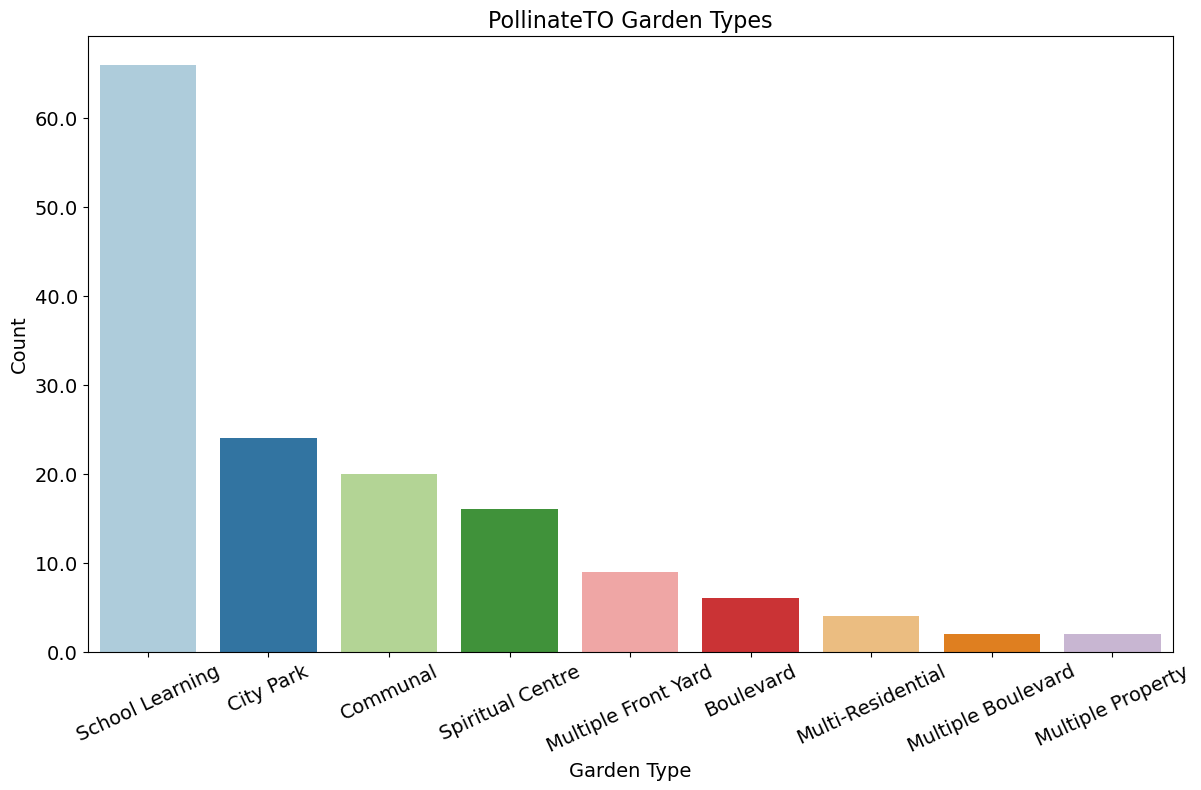

In [25]:
# Get the value counts for the 'Category' column
garden_types = pollinateto_data['GARDEN_TYPE'].value_counts()

# Convert the value counts to a DataFrame for plotting
garden_types_df = garden_types.reset_index()
garden_types_df.columns = ['GARDEN_TYPE', 'Count']
garden_types_df['GARDEN_TYPE'] = garden_types_df['GARDEN_TYPE'].str.replace(r'gardens?', '', case=False, regex=True).str.strip()

# Create the bar chart using Seaborn
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='GARDEN_TYPE', y='Count', data=garden_types_df, palette='Paired')

# Add labels and title
plt.title('PollinateTO Garden Types', fontsize=16)  # Adjust title size
plt.xlabel('Garden Type', fontsize=14)  # Adjust x-axis label size
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=25) 

ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)  # Change x-axis label size
ax.set_yticklabels(ax.get_yticks(), fontsize=14)  # Change y-axis label size


# Show the plot
plt.show()

In [48]:
# Convert to GeoDataFrame
pollinateto_data = gpd.GeoDataFrame(pollinateto_data, geometry='geometry', crs="EPSG:4326")

# Function to extract the first point from MultiPoint
def extract_first_point(geometry):
    if isinstance(geometry, MultiPoint):
        return geometry.geoms[0]  # Use .geoms to access the first point
    return geometry  # Return as-is if it's already a Point

# Apply the function to ensure we have single Points
pollinateto_data['geometry'] = pollinateto_data['geometry'].apply(extract_first_point)

# Paired Palette for Dynamic Mapping
paired_palette = sns.color_palette("Paired", len(pollinateto_data['GARDEN_TYPE'].unique()))
unique_types = pollinateto_data['GARDEN_TYPE'].unique()
color_mapping = dict(zip(unique_types, paired_palette.as_hex()))



# Initialize the map centered around Toronto
m = folium.Map(location=[43.7, -79.4], zoom_start=11, tiles='CartoDB positron')

# Add each point to the map with dynamic coloring
for _, row in pollinateto_data.iterrows():
    garden_type = row.GARDEN_TYPE  # Use exact match now
    color = color_mapping.get(garden_type)  # Safeguard unknown type
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],  # Extract latitude and longitude
        popup=(f"<strong>{row.PROJECT_NAME}</strong><br>"
               f"{row.PRIMARY_GARDEN_ADDRESS}<br>{garden_type}"),  
        tooltip=row.PROJECT_NAME,  
        radius=8,  
        color=color,
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Legend dynamically reflecting colors
legend_html = f'''
<div style="position: fixed; 
            bottom: 50px; right: 50px; width: 220px; height: 220px; 
            background-color: white; z-index:9999; font-size:14px;
            border:1px solid black; padding:10px;">
    <strong>Garden Type Legend</strong><br>
    {''.join([f"<i style='background:{c}; width: 10px; height: 10px; display:inline-block;'></i> {k}<br>" for k, c in color_mapping.items()])}
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m
